In [1]:
import pandas as pd

In [21]:
df=pd.read_excel("datas1.xlsx")

In [22]:
review_df = df[['Reviews','sentiment']]

print(review_df.shape)
review_df.head(5)

(13079, 2)


,Reviews,sentiment
0,Very high quality and beautiful Amazon is more...,positive
1,The product is really excellent although it re...,positive
2,Price is a very good choice in terms of perfor...,positive
3,Thanks to Amazon Turkey before the product I g...,positive
4,I got it very quickly It was very well preserv...,positive


In [23]:
df. columns

Index(['Unnamed: 0', 'rating', 'Reviews', 'sentiment'], dtype='object')

In [25]:
review_df = review_df[review_df['sentiment'] != 'neutral']

print(review_df.shape)
review_df.head(5)

(12229, 2)


,Reviews,sentiment
0,Very high quality and beautiful Amazon is more...,positive
1,The product is really excellent although it re...,positive
2,Price is a very good choice in terms of perfor...,positive
3,Thanks to Amazon Turkey before the product I g...,positive
4,I got it very quickly It was very well preserv...,positive


In [27]:
review_df["sentiment"].value_counts()

positive    11615
negative      614
Name: sentiment, dtype: int64

In [28]:
sentiment_label = review_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [30]:
reviews = review_df.Reviews.values
reviews

array(['Very high quality and beautiful Amazon is more than a privilege',
       'The product is really excellent although it really uses it intensively',
       'Price is a very good choice in terms of performance If you are using a double line the high battery will be very useful The camera the screen and other features are already great I had it on Monday morning Great speed With 7 TL Cargo difference Quick Delivery I bought it for two thousand four hundred forty TL on May 5',
       ...,
       'Team fully sealed and in perfect condition recommended to 100 complies with what comes in the publication',
       'I loved it better cost benefit',
       'It is a wonderful device the photos are very visible as a professional machine high speed is already installed the cleaning folder that gives you more security quick recharge finally  It is worth the price offered Sensational'],
      dtype=object)

In [31]:
df.Reviews=df.Reviews.astype(str)

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(reviews)

In [33]:
encoded_docs = tokenizer.texts_to_sequences(reviews)

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [37]:
embedding_vector_length = 32
model = Sequential()
vocab_size = len(tokenizer.word_index) + 1
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           398016    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 414,667
Trainable params: 414,667
Non-trainable params: 0
________________________________________________

In [38]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
306/306 [==============================] - 43s 130ms/step - loss: 0.2206 - accuracy: 0.9477 - val_loss: 0.1922 - val_accuracy: 0.9485
Epoch 2/5
306/306 [==============================] - 39s 127ms/step - loss: 0.1512 - accuracy: 0.9507 - val_loss: 0.1514 - val_accuracy: 0.9501
Epoch 3/5
306/306 [==============================] - 39s 127ms/step - loss: 0.0973 - accuracy: 0.9650 - val_loss: 0.1494 - val_accuracy: 0.9538
Epoch 4/5
306/306 [==============================] - 39s 128ms/step - loss: 0.0751 - accuracy: 0.9728 - val_loss: 0.1498 - val_accuracy: 0.9583
Epoch 5/5
306/306 [==============================] - 39s 127ms/step - loss: 0.0639 - accuracy: 0.9758 - val_loss: 0.1712 - val_accuracy: 0.9579


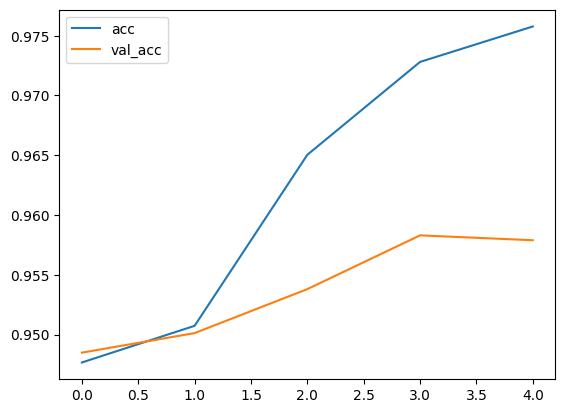

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

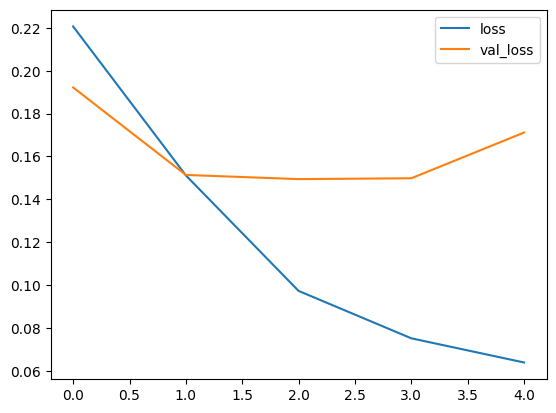

<Figure size 640x480 with 0 Axes>

In [40]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [41]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)


1/1 [==============================] - 0s 292ms/step
Predicted label:  positive
1/1 [==============================] - 0s 32ms/step
Predicted label:  negative
